# 타이타닉 시각화

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns #Seaborn 시각화 라이브러리 로딩
import matplotlib.pyplot as plt #matplotlib의 pylot로딩하고

## Load Dataset

In [3]:
train = pd.read_csv("train.csv", index_col="PassengerId")
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Seaborn

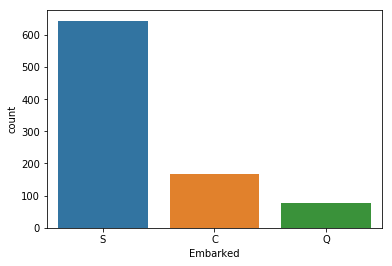

In [5]:
sns.countplot(data=train, x="Embarked")

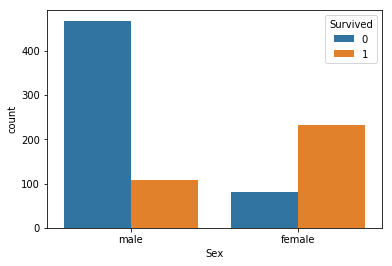

In [20]:
sns.countplot(data=train, x="Sex", hue="Survived")

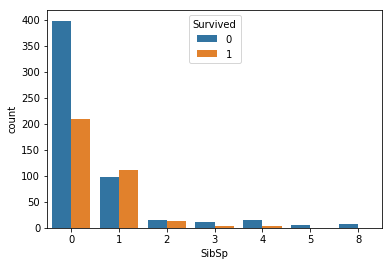

In [21]:
sns.countplot(data=train, x="SibSp", hue="Survived")

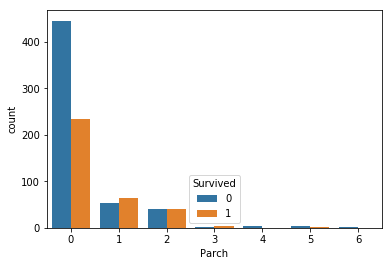

In [22]:
sns.countplot(data=train, x="Parch", hue="Survived")

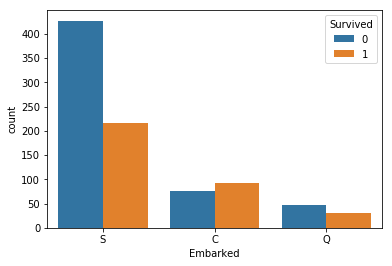

In [6]:
sns.countplot(data=train, x="Embarked", hue="Survived")

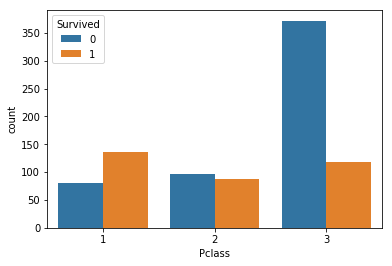

In [7]:
sns.countplot(data=train, x="Pclass", hue="Survived")

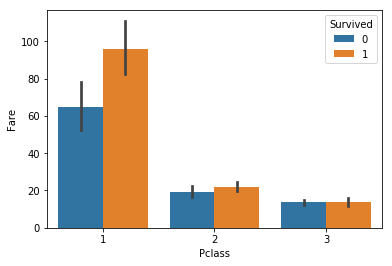

In [8]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")

### Distplot

In [10]:
train.shape

(891, 11)

In [9]:
fare = train[train["Fare"]>0].count()
fare

Survived    876
Pclass      876
Name        876
Sex         876
Age         707
SibSp       876
Parch       876
Ticket      876
Fare        876
Cabin       201
Embarked    874
dtype: int64

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


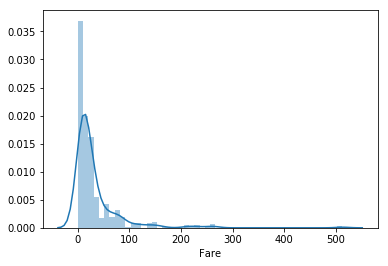

In [11]:
sns.distplot(train["Fare"], hist=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


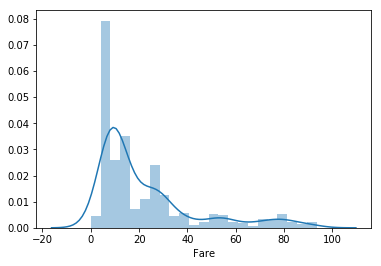

In [12]:
ignore_high_fare = train[train["Fare"] < 100]
sns.distplot(ignore_high_fare["Fare"], hist=True)

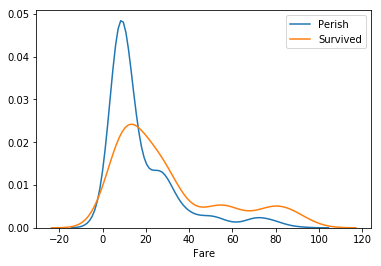

In [13]:
perish = ignore_high_fare[ignore_high_fare["Survived"] == 0] 
survived = ignore_high_fare[ignore_high_fare["Survived"] == 1] 

sns.distplot(perish["Fare"], hist=False, label="Perish")
sns.distplot(survived["Fare"], hist=False, label="Survived")

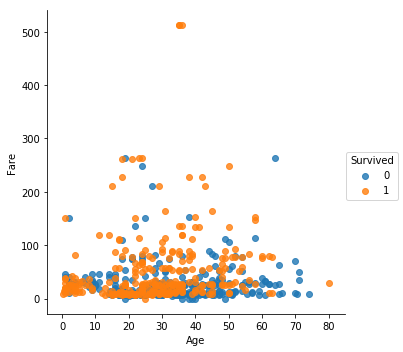

In [16]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

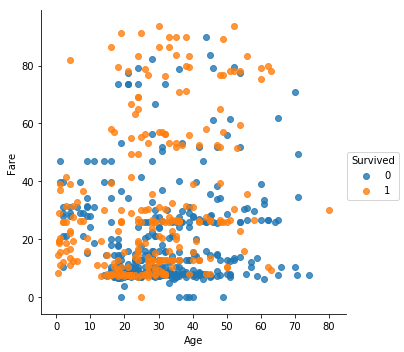

In [17]:
sns.lmplot(data=ignore_high_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [24]:
def find_title(name):
    return name.split(",")[1].split(".")[0]
train["Title"] = train["Name"].apply(find_title)
train[["Name", "Title"]].head()

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


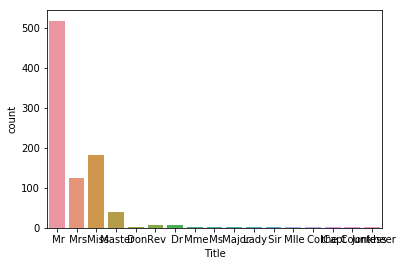

In [25]:
sns.countplot(data=train, x="Title")

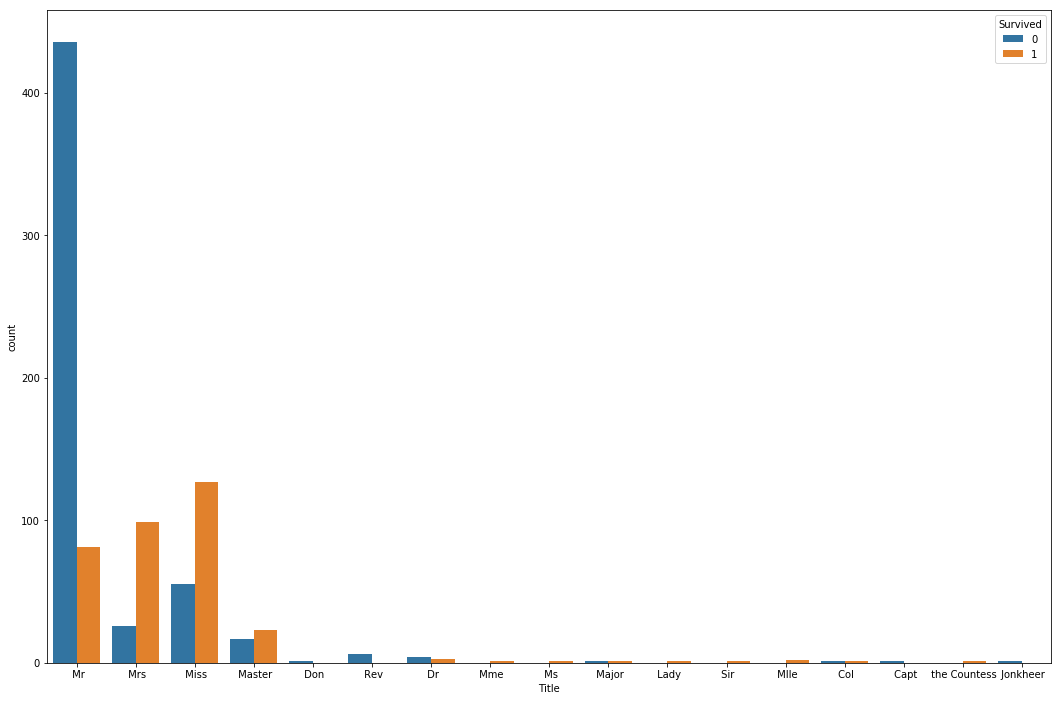

In [29]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.countplot(data=train, x="Title", ax=ax, hue="Survived")